In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv(r'C:\Users\User\Pictures\bank-full.csv', delimiter=';')

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


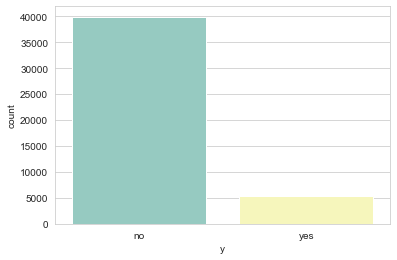

In [8]:
sns.set_style('whitegrid')
sns.countplot(df.y, palette='Set3')

In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

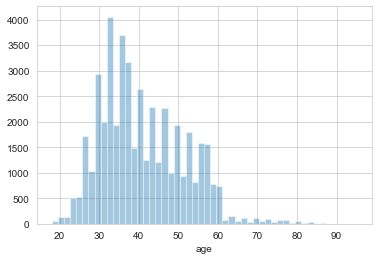

In [10]:
sns.distplot(df.age, kde=False)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text major ticklabel objects>)

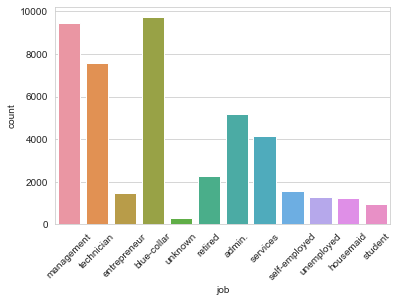

In [12]:
sns.countplot(df.job)
plt.xticks(rotation=45)

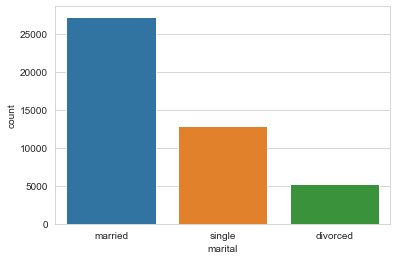

In [13]:
sns.countplot(df.marital)

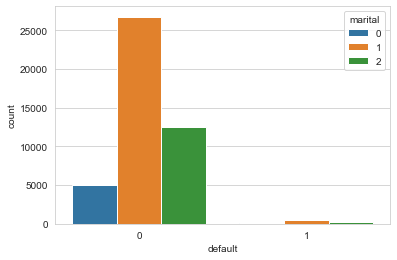

In [36]:
sns.countplot(df.default, hue=df.marital)

In [18]:
df = df.drop(['contact', 'day', 'month', 'duration', 'pdays', 'previous', 'poutcome'], axis=1)

In [20]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,1,no
1,44,technician,single,secondary,no,29,yes,no,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,1,no
4,33,unknown,single,unknown,no,1,no,no,1,no


In [21]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['job']=lab.fit_transform(df['job'])
df['marital']=lab.fit_transform(df['marital'])
df['education']=lab.fit_transform(df['education'])
df['default']=lab.fit_transform(df['default'])
df['housing']=lab.fit_transform(df['housing'])
df['loan']=lab.fit_transform(df['loan'])
df['y']=lab.fit_transform(df['y'])


In [22]:
df.head()

,age,job,marital,education,default,balance,housing,loan,campaign,y
0,58,4,1,2,0,2143,1,0,1,0
1,44,9,2,1,0,29,1,0,1,0
2,33,2,1,1,0,2,1,1,1,0
3,47,1,1,3,0,1506,1,0,1,0
4,33,11,2,3,0,1,0,0,1,0


In [23]:
X = df.drop('y', axis=1)
y = df['y']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log = LogisticRegression()

In [28]:
log.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [29]:
pred = log.predict(X_test)

In [30]:
log.score(X_test, y_test)

0.8790224483025545

In [31]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [32]:
accuracy_score(y_test, pred)

0.8790224483025545

In [33]:
confusion_matrix(y_test, pred)

array([[7949,    3],
       [1091,    0]], dtype=int64)